In [1]:
f = read.csv("fit_data.csv");

In [2]:
vars = cbind(f$Mod, f$Udl, f$time, f$Pop1, f$Pop10, f$Anime,f$LoreFriendly,f$NotLoreFriendly,f$SexySkimpy,f$Creatures,f$PlantsFoliage,f$AnimationModified,f$AnimationNew,f$EnvironmentOther,f$Facemodels,f$EnvironmentWeather,f$LeveledLists,f$Newmodels,f$Newtextures,f$ScriptedEvents,f$Chargen,f$ENBPreset,f$GameplayEffectsChanges,f$Official,f$PerformanceOptimization,f$Replacer,f$none,f$NotSafeForWork,f$Nudity,f$Unrealistic,f$ArmorShields,f$Clothing,f$ClothingFemale,f$CreaturesRideable,f$LocationsPlayerOwned,f$NPCVendors,f$Weapons,f$Birthsigns,f$Hair,f$Quests,f$Formalecharacters,f$RelatedtoMoviesTVOtherGames,f$FairandBalanced);
colf = c("Mod", "Udl", "time", "Pop1", "Pop10", "Anime","LoreFriendly","NotLoreFriendly","SexySkimpy","Creatures","PlantsFoliage","AnimationModified","AnimationNew","EnvironmentOther","Facemodels","EnvironmentWeather","LeveledLists","Newmodels","Newtextures","ScriptedEvents","Chargen","ENBPreset","GameplayEffectsChanges","Official","PerformanceOptimization","Replacer","none","NotSafeForWork","Nudity","Unrealistic","ArmorShields","Clothing","ClothingFemale","CreaturesRideable","LocationsPlayerOwned","NPCVendors","Weapons","Birthsigns","Hair","Quests","Formalecharacters","RelatedtoMoviesTVOtherGames","FairandBalanced");

dimnames(vars)[[2]] <- colf
data <- data.frame(vars);

dim(vars)

[1] 39740    43

In [3]:

summary(data);


      Mod             Udl               time             Pop1        
 Min.   :    8   Min.   :      0   Min.   :  10.0   Min.   :0.00000  
 1st Qu.:16208   1st Qu.:    241   1st Qu.: 533.0   1st Qu.:0.00000  
 Median :31784   Median :    733   Median : 985.0   Median :0.00000  
 Mean   :34239   Mean   :  10818   Mean   : 888.4   Mean   :0.01002  
 3rd Qu.:54016   3rd Qu.:   2813   3rd Qu.:1277.0   3rd Qu.:0.00000  
 Max.   :70742   Max.   :8224648   Max.   :1450.0   Max.   :1.00000  
     Pop10         Anime          LoreFriendly    NotLoreFriendly  
 Min.   :0.0   Min.   :0.00000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.:0.0   1st Qu.:0.00000   1st Qu.:0.0000   1st Qu.:0.00000  
 Median :0.0   Median :0.00000   Median :0.0000   Median :0.00000  
 Mean   :0.1   Mean   :0.01799   Mean   :0.2167   Mean   :0.05159  
 3rd Qu.:0.0   3rd Qu.:0.00000   3rd Qu.:0.0000   3rd Qu.:0.00000  
 Max.   :1.0   Max.   :1.00000   Max.   :1.0000   Max.   :1.00000  
   SexySkimpy        Creatures    

In [4]:
# Define a function
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max) > level;
  res[sel,sel];
}
hiCor(data,.6)

,Mod,time,Clothing,ClothingFemale
Mod,1.00000000,-0.99986642,0.03251579,0.01427583
time,-0.99986642,1.00000000,-0.03251915,-0.01426965
Clothing,0.03251579,-0.03251915,1.00000000,0.61442485
ClothingFemale,0.01427583,-0.01426965,0.61442485,1.00000000


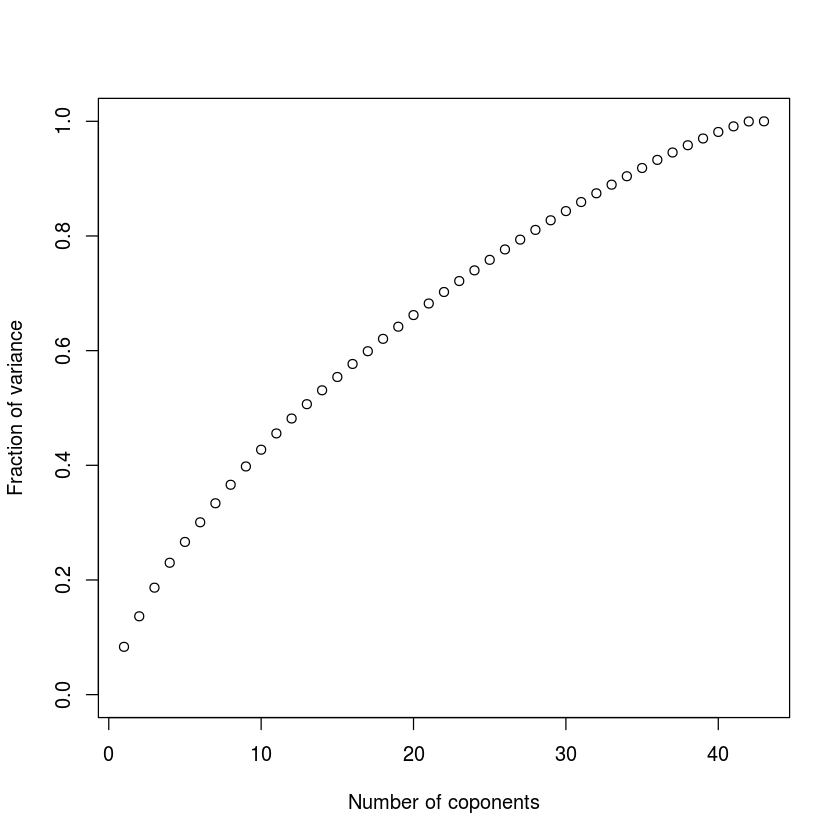

In [5]:
plot(1:43,cumsum(prcomp(vars, retx=F,scale=T)$sdev^2)/sum(prcomp(vars, retx=F,scale=T)$sdev^2),ylim=c(0,1),xlab="Number of coponents",ylab="Fraction of variance");

In [6]:
res<-prcomp(vars, retx=F,scale=T)$rotation[,1:3];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
for (i in 1:3)
  print(t(res[resAbs[,i]>.1,i,drop=FALSE]));

          Udl      Pop1     Pop10 LoreFriendly NotLoreFriendly Creatures
PC1 0.1717983 0.1706056 0.1925045    0.2608587       0.1054653 0.1360585
    PlantsFoliage AnimationModified AnimationNew EnvironmentOther Facemodels
PC1      0.147599         0.1248447    0.1329944        0.1356857  0.1090029
    EnvironmentWeather LeveledLists Newmodels Newtextures ScriptedEvents
PC1          0.1057561    0.1464816 0.2309095   0.2243477      0.1640027
    GameplayEffectsChanges  Official  Replacer       none ArmorShields
PC1              0.1350173 0.1125209 0.1445104 -0.2907292    0.1880819
     Clothing ClothingFemale CreaturesRideable LocationsPlayerOwned NPCVendors
PC1 0.2144762      0.2028449         0.1105471             0.105623  0.1612238
      Weapons Birthsigns      Hair    Quests Formalecharacters
PC1 0.1785382  0.1007667 0.1088814 0.1563316         0.1726525
    RelatedtoMoviesTVOtherGames FairandBalanced
PC1                   0.1143775       0.2494043
          Mod        Udl       t

In [7]:
modl <- glm(Pop1 ~ time+Anime+LoreFriendly+NotLoreFriendly+SexySkimpy+Creatures+PlantsFoliage+AnimationModified+AnimationNew+EnvironmentOther+Facemodels+EnvironmentWeather+LeveledLists+Newmodels+Newtextures+ScriptedEvents+Chargen+ENBPreset+GameplayEffectsChanges+Official+PerformanceOptimization+Replacer+none+NotSafeForWork+Nudity+Unrealistic+ArmorShields+Clothing+ClothingFemale+CreaturesRideable+LocationsPlayerOwned+NPCVendors+Weapons+Birthsigns+Hair+Quests+Formalecharacters+RelatedtoMoviesTVOtherGames+FairandBalanced,family=binomial,data=data);
summary(modl);


Call:
glm(formula = Pop1 ~ time + Anime + LoreFriendly + NotLoreFriendly + 
    SexySkimpy + Creatures + PlantsFoliage + AnimationModified + 
    AnimationNew + EnvironmentOther + Facemodels + EnvironmentWeather + 
    LeveledLists + Newmodels + Newtextures + ScriptedEvents + 
    Chargen + ENBPreset + GameplayEffectsChanges + Official + 
    PerformanceOptimization + Replacer + none + NotSafeForWork + 
    Nudity + Unrealistic + ArmorShields + Clothing + ClothingFemale + 
    CreaturesRideable + LocationsPlayerOwned + NPCVendors + Weapons + 
    Birthsigns + Hair + Quests + Formalecharacters + RelatedtoMoviesTVOtherGames + 
    FairandBalanced, family = binomial, data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3208  -0.1155  -0.0602  -0.0245   4.5006  

Coefficients:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -8.4658957  0.2538443 -33.351  < 2e-16 ***
time                         0.0024236  0.

In [9]:
modl2 <- glm(Pop10 ~ time+Anime+LoreFriendly+NotLoreFriendly+SexySkimpy+Creatures+PlantsFoliage+AnimationModified+AnimationNew+EnvironmentOther+Facemodels+EnvironmentWeather+LeveledLists+Newmodels+Newtextures+ScriptedEvents+Chargen+ENBPreset+GameplayEffectsChanges+Official+PerformanceOptimization+Replacer+none+NotSafeForWork+Nudity+Unrealistic+ArmorShields+Clothing+ClothingFemale+CreaturesRideable+LocationsPlayerOwned+NPCVendors+Weapons+Birthsigns+Hair+Quests+Formalecharacters+RelatedtoMoviesTVOtherGames+FairandBalanced,family=binomial,data=data);
summary(modl2);


Call:
glm(formula = Pop10 ~ time + Anime + LoreFriendly + NotLoreFriendly + 
    SexySkimpy + Creatures + PlantsFoliage + AnimationModified + 
    AnimationNew + EnvironmentOther + Facemodels + EnvironmentWeather + 
    LeveledLists + Newmodels + Newtextures + ScriptedEvents + 
    Chargen + ENBPreset + GameplayEffectsChanges + Official + 
    PerformanceOptimization + Replacer + none + NotSafeForWork + 
    Nudity + Unrealistic + ArmorShields + Clothing + ClothingFemale + 
    CreaturesRideable + LocationsPlayerOwned + NPCVendors + Weapons + 
    Birthsigns + Hair + Quests + Formalecharacters + RelatedtoMoviesTVOtherGames + 
    FairandBalanced, family = binomial, data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9651  -0.4623  -0.3163  -0.2410   3.2405  

Coefficients:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -4.016e+00  6.254e-02 -64.226  < 2e-16 ***
time                         1.388e-03  5

In [10]:
anova(modl, test="Chi");

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,39739,4456.515,NA
time,1,165.1599,39738,4291.355,8.440712e-38
Anime,1,17.36865,39737,4273.987,3.078625e-05
LoreFriendly,1,448.1124,39736,3825.874,1.857437e-99
NotLoreFriendly,1,36.22324,39735,3789.651,1.759597e-09
SexySkimpy,1,13.29876,39734,3776.352,0.0002655814
Creatures,1,12.68953,39733,3763.663,0.0003677089
PlantsFoliage,1,21.24352,39732,3742.419,4.044765e-06
AnimationModified,1,96.67849,39731,3645.741,8.155036e-23
AnimationNew,1,9.575261,39730,3636.165,0.001972168


In [11]:
anova(modl2, test="Chi");

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,39739,25837.59,NA
time,1,581.33,39738,25256.26,1.926549e-128
Anime,1,214.5286,39737,25041.74,1.412209e-48
LoreFriendly,1,839.2562,39736,24202.48,1.575122e-184
NotLoreFriendly,1,203.1231,39735,23999.36,4.348429e-46
SexySkimpy,1,286.8983,39734,23712.46,2.357224e-64
Creatures,1,21.42447,39733,23691.03,3.680442e-06
PlantsFoliage,1,32.30323,39732,23658.73,1.318941e-08
AnimationModified,1,221.2769,39731,23437.45,4.762722e-50
AnimationNew,1,57.40683,39730,23380.05,3.543752e-14


In [12]:
drop1(modl, test="Chi");

,Df,Deviance,AIC,LRT,Pr(>Chi)
,NA,3129.389,3209.389,NA,NA
time,1,3356.187,3434.187,226.7971,2.977546e-51
Anime,1,3133.086,3211.086,3.696603,0.05452336
LoreFriendly,1,3238.64,3316.64,109.2501,1.430488e-25
NotLoreFriendly,1,3138.577,3216.577,9.187603,0.002436597
SexySkimpy,1,3134.954,3212.954,5.564789,0.01832522
Creatures,1,3129.6,3207.6,0.2104378,0.6464245
PlantsFoliage,1,3131.037,3209.037,1.647895,0.1992457
AnimationModified,1,3147.996,3225.996,18.60611,1.607044e-05
AnimationNew,1,3137.996,3215.996,8.60633,0.003349966


In [13]:
drop1(modl2, test="Chi");

,Df,Deviance,AIC,LRT,Pr(>Chi)
,NA,21959.81,22039.81,NA,NA
time,1,22824.42,22902.42,864.61,4.845755e-190
Anime,1,22016.04,22094.04,56.23817,6.42031e-14
LoreFriendly,1,22147.58,22225.58,187.7765,9.720241e-43
NotLoreFriendly,1,21981.09,22059.09,21.28552,3.957101e-06
SexySkimpy,1,22068.01,22146.01,108.2073,2.420894e-25
Creatures,1,21960.66,22038.66,0.8563895,0.354751
PlantsFoliage,1,21960.76,22038.76,0.9580632,0.3276753
AnimationModified,1,22027.16,22105.16,67.3558,2.266745e-16
AnimationNew,1,21998.67,22076.67,38.8624,4.547563e-10
